# Ocena jakości wina Vinho Verde

Celem zadania jest ocena jakości wina.

Uwzględniono dwa zbiory danych dotyczące próbek czerwonego wina Vinho Verde z północy Portugalii.

Źródło: 
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

- 1600 obserwacji z 11 zmiennymi wejściowymi i jedną zmienną wyjściową.
- Zmienne opisują:
  1. Stałą kwasowość.
  2. Kwasowość lotną.
  3. Kwas cytrynowy.
  4. Cukier resztkowy.
  5. Chlorki.
  6. Wolny dwutlenek siarki.
  7. Całkowity dwutlenek siarki.
  8. Gęstość.
  9. pH.
  10. Siarczany.
  11. Alkohol.
  12. Jakość (ocena od 0 do 10).

[Dane](https://github.com/UEPP40/PUM/blob/c1ab27e52bc82cc151bb217b27bd25dfd057d9e8/winequality-red.csv)


( ͡° ͜ʖ ͡°) I really don't know much about wine


# Import bibliotek, pliku csv oraz wstępny przegląd danych

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import hashlib as hl
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [2]:
# Wczytanie danych z pliku CSV do ramki danych
wineDataFrame = pd.read_csv('winequality-red.csv', sep=";")

# Wyświetlenie pierwszych 5 rekordów wraz z podstawowymi informacjami o danych
print("Pierwsze 5 rekordów zbioru danych:")
print(wineDataFrame.head())

print("\nInformacje o zbiorze danych:")
# Wyświetlenie podstawowych informacji o zbiorze danych
print(wineDataFrame.info())

print("\nStatystyki opisowe zbioru danych:")
# Wyświetlenie statystyk opisowych zbioru danych
print(wineDataFrame.describe())


Pierwsze 5 rekordów zbioru danych:
   fixed acidity  volatile acidity citric acid residual sugar chlorides  \
0            7.4              0.70           0            1.9     0.076   
1            7.8              0.88           0            2.6     0.098   
2            7.8              0.76        0.04            2.3     0.092   
3           11.2              0.28        0.56            1.9     0.075   
4            7.4              0.70           0            1.9     0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

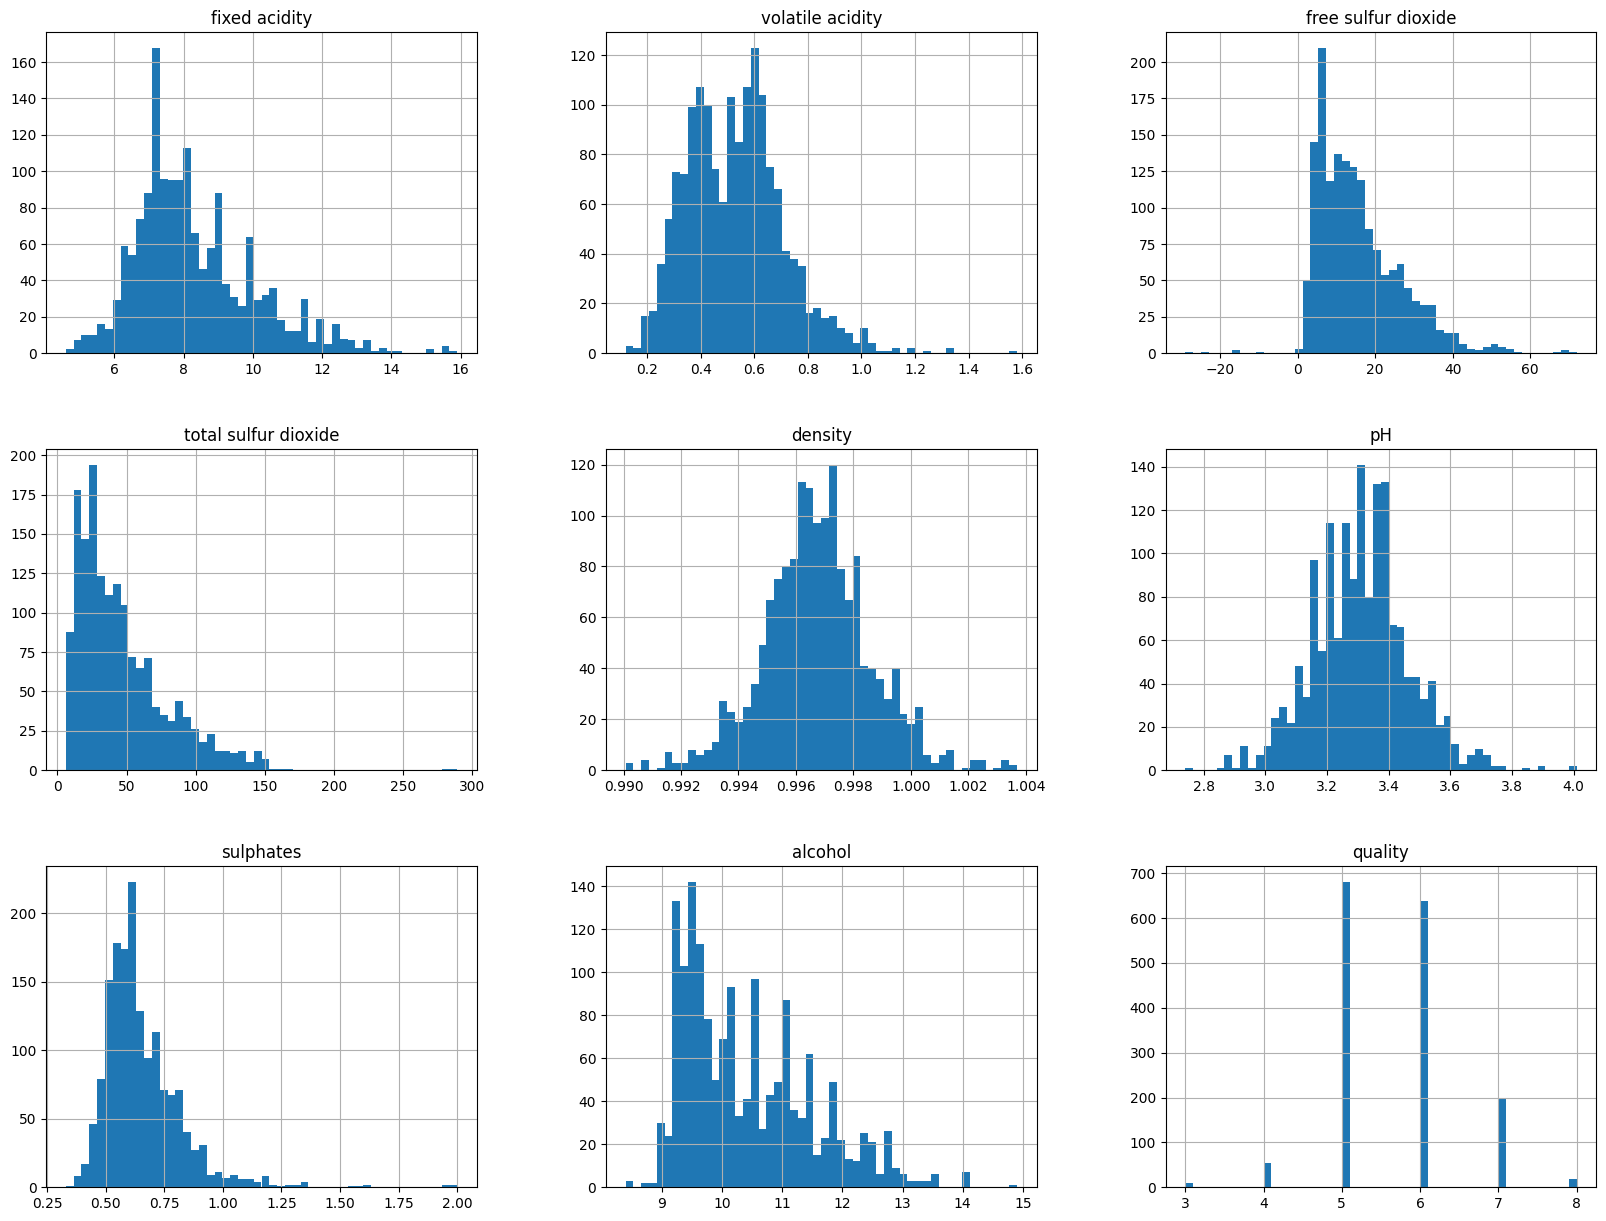

In [3]:
# Narysowanie histogramów dla wszystkich zmiennych oraz kilku innych przydatnych wykresów
wineDataFrame.hist(bins=50, figsize=(20,15))
plt.show()

# Czyszczenie danych

In [4]:
# # !Technicznie dane bakujące można by było uzupełnić statystycznie ale powinno być na tyle dużo danych że można bez problemu je wywalić
# # Usuń wiersze z duplikatami
# wineDataFrame.drop_duplicates(inplace=True)
# # Usuń wiersze z brakującymi danymi
# wineDataFrame.dropna(inplace=True)
# # Wyświetlenie podstawowych informacji o zbiorze danych
# print(wineDataFrame.info())
# print(wineDataFrame.shape)

In [6]:
# usuń zbędne znaki (nie będące Ascii)
for column in wineDataFrame.columns:
    wineDataFrame[column] = wineDataFrame[column].astype(str).str.replace(r'[^\x00-\x7F]+', '', regex=True)
# zmien typ zmiennych ilościowych
for column in wineDataFrame.columns:
    wineDataFrame[column] = pd.to_numeric(wineDataFrame[column], errors='coerce')
# Wyświetlenie podstawowych informacji o zbiorze danych
print(wineDataFrame.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1363 non-null   float64
 1   volatile acidity      1363 non-null   float64
 2   citric acid           1360 non-null   float64
 3   residual sugar        1362 non-null   float64
 4   chlorides             1360 non-null   float64
 5   free sulfur dioxide   1363 non-null   float64
 6   total sulfur dioxide  1363 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1363 non-null   float64
 9   sulphates             1363 non-null   float64
 10  alcohol               1363 non-null   float64
 11  quality               1363 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.4 KB
None


In [7]:
# Usuń wiersze z duplikatami
wineDataFrame.drop_duplicates(inplace=True)

choice = input("Wpisz 1 aby usunąć wiersze z brakującymi wartościami albo 2 aby uzupełnić je medianą: ")

if choice == '1':
    # Usuń wiersze z brakującymi danymi
    wineDataFrame.dropna(inplace=True)
elif choice == '2':
    # Uzupełnij brakujące dane medianą
    wineDataFrame.fillna(wineDataFrame.median(), inplace=True)
else:
    print("Bruh, you had one job...")

# Display basic information about the data set
print(wineDataFrame.info())
print(wineDataFrame.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1363 non-null   float64
 1   volatile acidity      1363 non-null   float64
 2   citric acid           1363 non-null   float64
 3   residual sugar        1363 non-null   float64
 4   chlorides             1363 non-null   float64
 5   free sulfur dioxide   1363 non-null   float64
 6   total sulfur dioxide  1363 non-null   float64
 7   density               1363 non-null   float64
 8   pH                    1363 non-null   float64
 9   sulphates             1363 non-null   float64
 10  alcohol               1363 non-null   float64
 11  quality               1363 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.4 KB
None
(1363, 12)


In [8]:
# print empty values
print(wineDataFrame.isnull().sum())
# uzupełnij braki średnią
for column in wineDataFrame.columns:
    if wineDataFrame[column].isnull().sum() > 0:
        wineDataFrame[column] = wineDataFrame[column].fillna(method='pad')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
# drop kicknij kolumny ze znacznie odstającymi wartościami (pomiń kolumnę "quality")
for column in wineDataFrame.columns:
    if column != 'quality' and pd.api.types.is_numeric_dtype(wineDataFrame[column]):
        Q1 = wineDataFrame[column].quantile(0.10)
        Q3 = wineDataFrame[column].quantile(0.90)
        IQR = Q3 - Q1

        filter = (wineDataFrame[column] >= Q1 - 1.5 * IQR) & (wineDataFrame[column] <= Q3 + 1.5 * IQR)
        wineDataFrame = wineDataFrame.loc[filter]

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1281 non-null   float64
 1   volatile acidity      1281 non-null   float64
 2   citric acid           1281 non-null   float64
 3   residual sugar        1281 non-null   float64
 4   chlorides             1281 non-null   float64
 5   free sulfur dioxide   1281 non-null   float64
 6   total sulfur dioxide  1281 non-null   float64
 7   density               1281 non-null   float64
 8   pH                    1281 non-null   float64
 9   sulphates             1281 non-null   float64
 10  alcohol               1281 non-null   float64
 11  quality               1281 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 130.1 KB
None


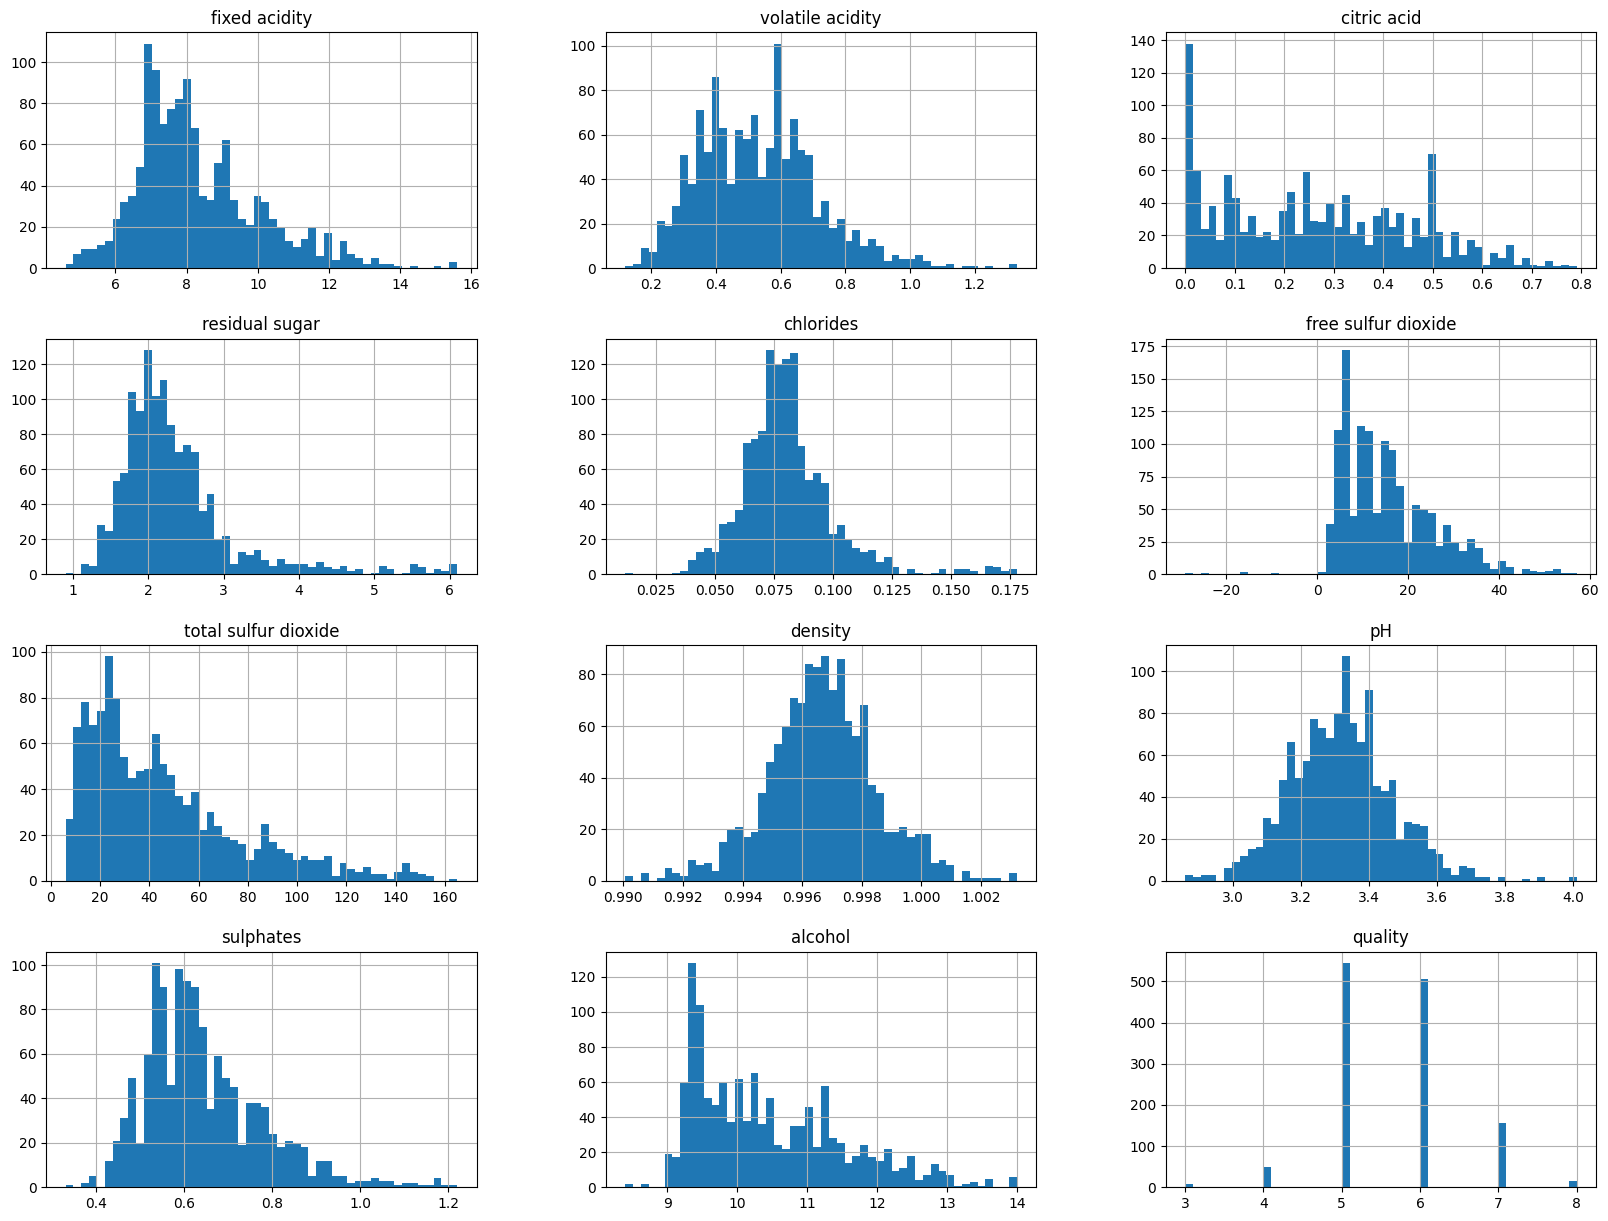

In [10]:
print(wineDataFrame.info())
# plot histogram
wineDataFrame.hist(bins=50, figsize=(20,15))
plt.show()


In [11]:
# stwórz obiekt enkodera
le = LabelEncoder()
for column in wineDataFrame.columns:
    if pd.api.types.is_object_dtype(wineDataFrame[column]):
        wineDataFrame[column] = le.fit_transform(wineDataFrame[column])
# sprawdź transformacje
wineDataFrame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


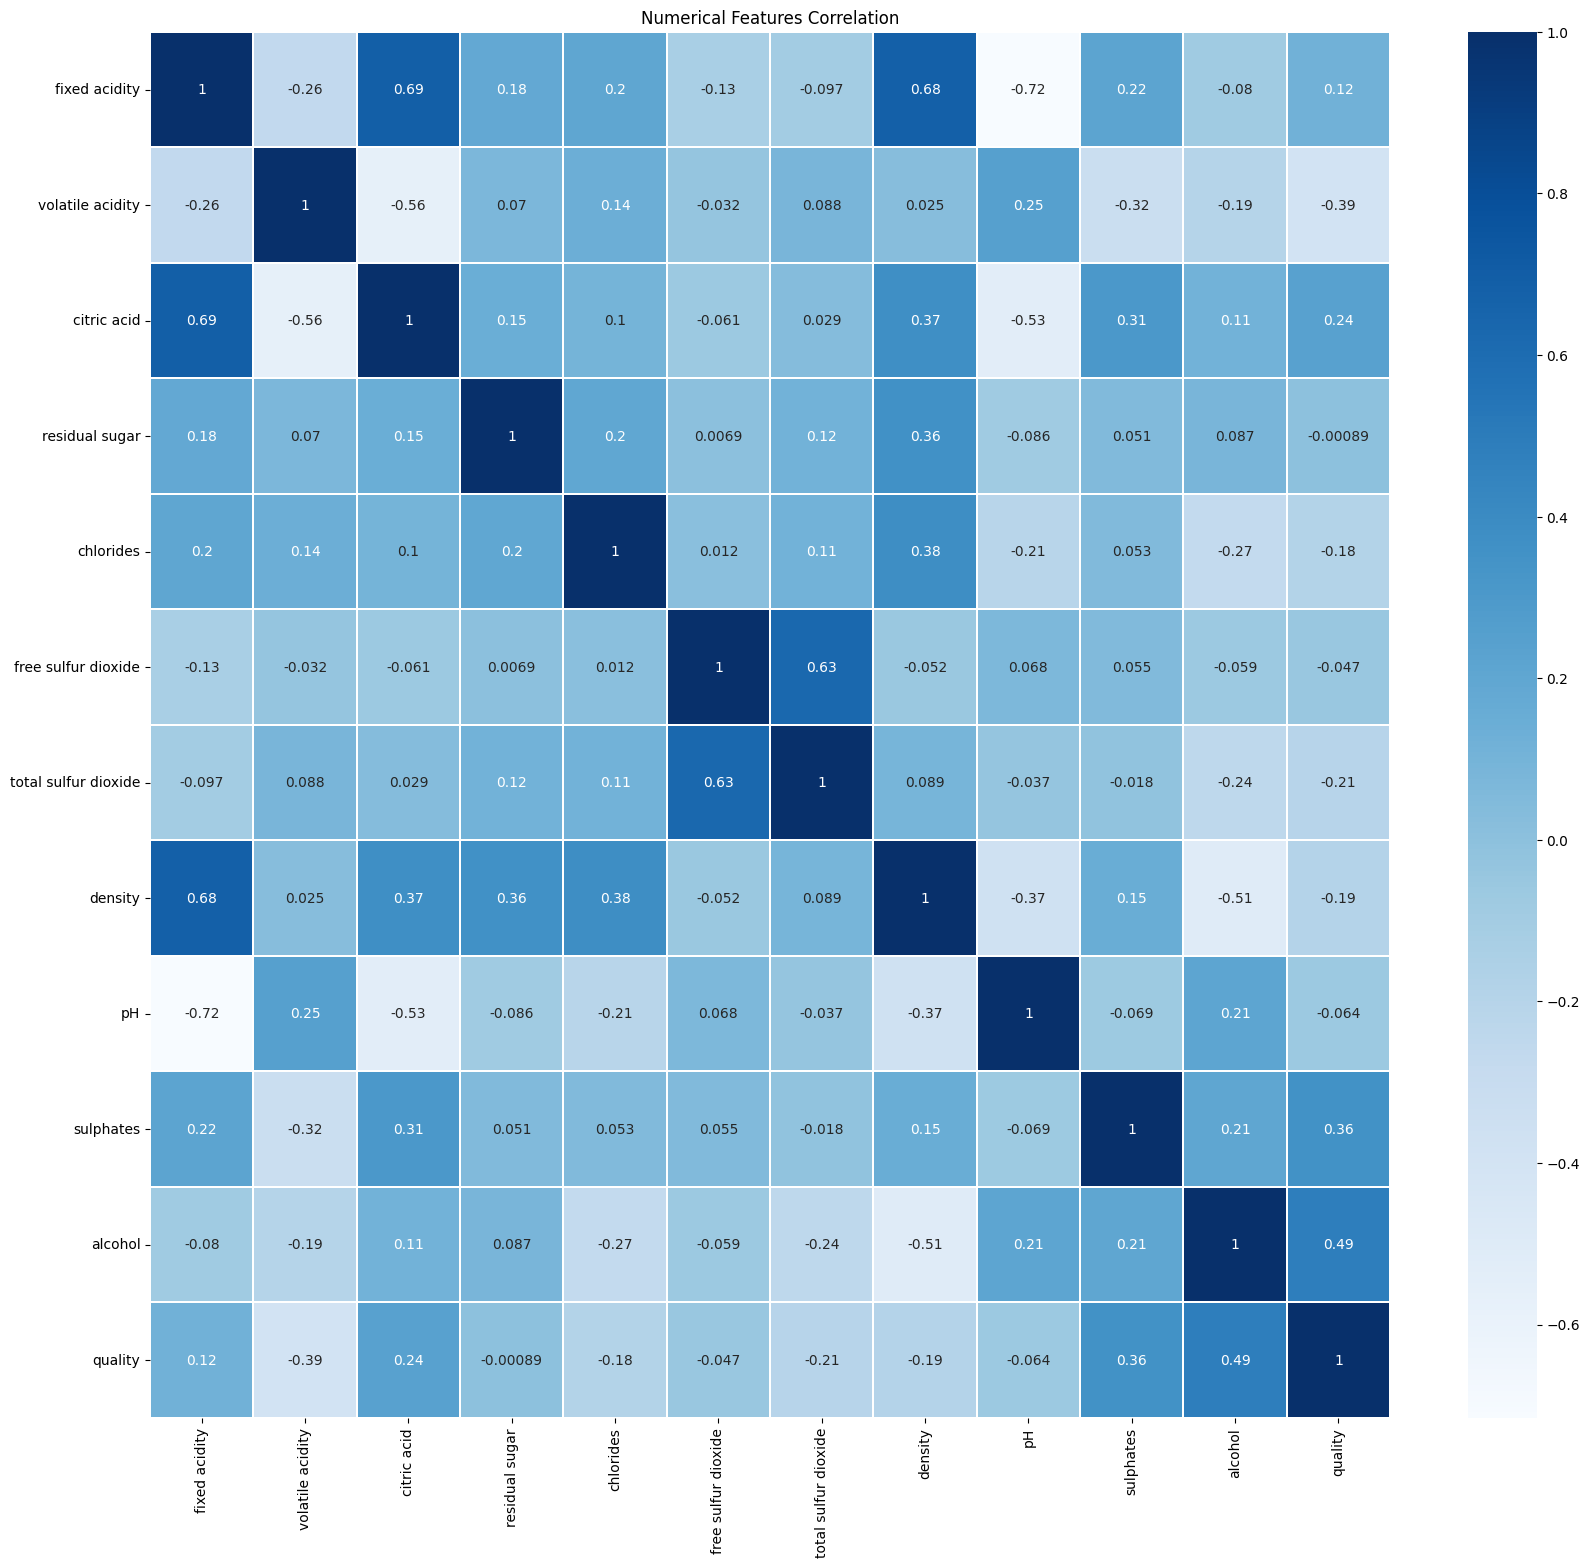

In [12]:
# wskaż korelacje
plt.figure(figsize = (20, 18)) 
# creating the correlation heatmap
sns.heatmap(wineDataFrame.corr(), annot = True, linewidths = 0.1, cmap = 'Blues')
plt.title('Numerical Features Correlation')
plt.show()

In [13]:
corr_matrix = wineDataFrame.corr()
cor_target = abs(corr_matrix["quality"])
relevant_features = cor_target[cor_target>0.01]
wineDataFrame = wineDataFrame[relevant_features.index]

# print which features are relevant
print("Relevant features (correlation with 'quality' > 0.01):\n", relevant_features)

# and which are not
print("\nNon-relevant features (correlation with 'quality' <= 0.01):\n", cor_target[cor_target<=0.01])

Relevant features (correlation with 'quality' > 0.01):
 fixed acidity           0.118343
volatile acidity        0.388077
citric acid             0.236434
chlorides               0.184345
free sulfur dioxide     0.047381
total sulfur dioxide    0.205221
density                 0.190594
pH                      0.064431
sulphates               0.356178
alcohol                 0.488463
quality                 1.000000
Name: quality, dtype: float64

Non-relevant features (correlation with 'quality' <= 0.01):
 residual sugar    0.000887
Name: quality, dtype: float64


❌❌❌ ***PCA DO NOT UNCOMMENT IF YOU DO NOT KNOW WHAT ARE YOU DOING (I DON'T TBH)*** ❌❌❌

In [14]:
# # Zastosuj transformację PCA (Principal Component Analysis) do danych
# pca = PCA(n_components=10)
# filtered_pca_df = pca.fit(wineDataFrame)
# print(pca.explained_variance_ratio_)
# print(filtered_pca_df.components_)

# # Wypisz dataframe po zastosowaniu PCA oraz wyjaśnij jakie zmienne są najważniejsze
# filtered_pca_df = pca.transform(wineDataFrame)
# filtered_pca_df = pd.DataFrame(filtered_pca_df, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"])
# print(filtered_pca_df)

# Podział danych na zbiory treningowe i testowe

In [15]:
# Zrobiłem to tylko po to by w kodzi pojawiło się słowo 'Amongus'

string_to_int = lambda s: int(hl.md5(s.encode()).hexdigest(), 16) % 4294967295

# Podziel dane na zbiór uczący i testowy
X = wineDataFrame.drop(columns=["quality"])
y = wineDataFrame["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=string_to_int("Amongus"))

In [16]:
# Display the data splits
print("Training data (features):")
print(X_train.head())
print("\nTest data (features):")
print(X_test.head())
print("\nTraining data (target):")
print(y_train.head())
print("\nTest data (target):")
print(y_test.head())

Training data (features):
      fixed acidity  volatile acidity  citric acid  chlorides  \
268             6.9              0.54         0.04      0.077   
1152            8.3              0.60         0.25      0.118   
718             8.4              0.56         0.04      0.082   
54              7.6              0.51         0.15      0.110   
1073            8.0              0.62         0.33      0.088   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
268                   7.0                  27.0  0.99870  3.69       0.91   
1152                  9.0                  38.0  0.99616  3.15       0.53   
718                  10.0                  22.0  0.99760  3.22       0.44   
54                   33.0                  73.0  0.99550  3.17       0.63   
1073                 16.0                  37.0  0.99720  3.31       0.58   

      alcohol  
268       9.4  
1152      9.8  
718       9.6  
54       10.2  
1073     10.7  

Test data (features):
 